In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
dataset_root = "/data/user_data/gdhanuka/STAR_dataset"

In [4]:
## Video and Segment frequency analysis
video_segments = pd.read_csv(f"{dataset_root}/Video_Segments.csv")

print(video_segments.head())
print(video_segments.shape)

# # process the start and end times, and store the lengths of the videos
# lengths = []
# for i in range(video_segments.shape[0]):
#     start = video_segments.iloc[i]["start"]
#     end = video_segments.iloc[i]["end"]
#     lengths.append(end - start)

# # make plot of video lengths
# sns.histplot(lengths, bins=50, kde=True)
# plt.xlabel("Video Length (s)")
# plt.ylabel("Frequency")
# plt.title("Distribution of Video Lengths")
# plt.savefig("video_lengths.png")

# # print number of videos having length from 0 to 10 seconds
# count = 0
# for length in lengths:
#     if length <= 10:
#         count += 1
# print("Number of videos having length <= 10 seconds:", count)

# count = 0
# for length in lengths:
#     if length >= 20:
#         count += 1

# print("Number of videos having length >= 20 seconds:", count)

# analyse number of segments per video_id
# video_id_counts = video_segments["video_id"].value_counts()

# # print number of videos having 1 segment
# count = 0
# for value in video_id_counts:
#     if value < 5:
#         count += 1
# print("Number of videos less than 5 segment:", count)

# print(video_id_counts)

# # make plot of number of segments per video_id
# plt.xlabel("Number of Segments")
# plt.ylabel("Frequency")
# plt.title("Distribution of Number of Segments per Video ID")
# sns.histplot(video_id_counts, bins=50, kde=True)
# plt.savefig("segments_per_video_id.png")


        question_id video_id  start   end
0  Interaction_T1_0    YSKX3   12.1  18.0
1  Interaction_T1_1    YSKX3   11.8  17.3
2  Interaction_T1_2    YSKX3   13.0  18.0
3  Interaction_T1_3    YSKX3    5.4  14.1
4  Interaction_T1_4    TJZ0P    7.7  15.7
(60206, 4)


In [5]:
# Analyse the QA pairs in the val.json file
val = pd.read_json(f"{dataset_root}/STAR_val.json")
print(val.head())
print(val.shape)

         question_id                                   question video_id  \
0  Interaction_T1_13  Which object was tidied up by the person?    6H78U   
1  Interaction_T1_14  Which object was tidied up by the person?    6H78U   
2  Interaction_T1_31     Which object was thrown by the person?    RNLTR   
3  Interaction_T1_32   Which object was put down by the person?    RNLTR   
4  Interaction_T1_40  Which object was tidied up by the person?    VNQTH   

   start   end               answer  \
0   11.1  19.6         The clothes.   
1   15.6  22.7         The clothes.   
2    7.3  13.5         The clothes.   
3   11.6  16.4            The shoe.   
4    2.7   9.2  The closet/cabinet.   

                                    question_program  \
0  [{'function': 'Situations', 'value_input': []}...   
1  [{'function': 'Situations', 'value_input': []}...   
2  [{'function': 'Situations', 'value_input': []}...   
3  [{'function': 'Situations', 'value_input': []}...   
4  [{'function': 'Situations

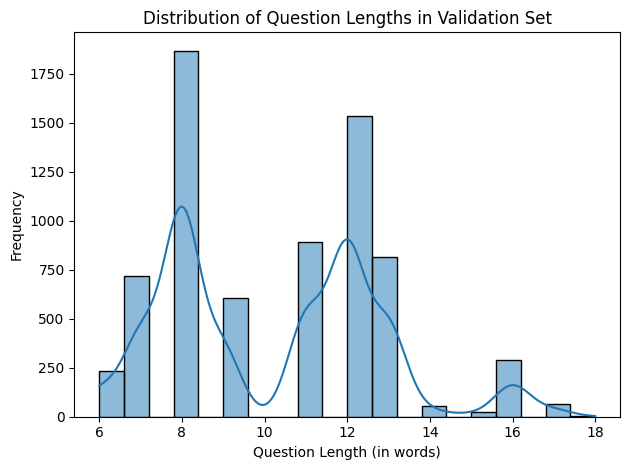

In [6]:
# analyse the question length distribution
question_lengths = val["question"].apply(lambda x: len(x.split()))
sns.histplot(question_lengths, bins=20, kde=True)
plt.xlabel("Question Length (in words)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths in Validation Set")
plt.tight_layout()
plt.savefig("question_lengths.png")
plt.show()

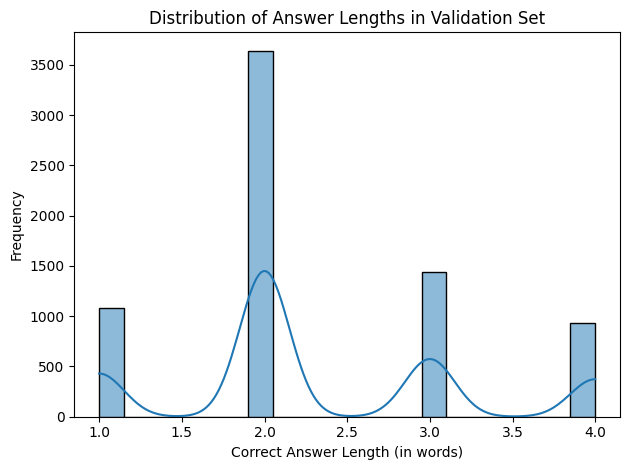

In [7]:
# analyse the answer length distribution
question_lengths = val["answer"].apply(lambda x: len(x.split()))
sns.histplot(question_lengths, bins=20, kde=True)
plt.xlabel("Correct Answer Length (in words)")
plt.ylabel("Frequency")
plt.title("Distribution of Answer Lengths in Validation Set")
plt.savefig("answer_lengths.png")
plt.tight_layout()
plt.show()

In [12]:
import json
with open(f"{dataset_root}/STAR_val.json") as f:
    val_data = json.load(f)

print(val_data[0])

{'question_id': 'Interaction_T1_13', 'question': 'Which object was tidied up by the person?', 'video_id': '6H78U', 'start': 11.1, 'end': 19.6, 'answer': 'The clothes.', 'question_program': [{'function': 'Situations', 'value_input': []}, {'function': 'Actions', 'value_input': []}, {'function': 'Filter_Actions_with_Verb', 'value_input': ['tidy']}, {'function': 'Unique', 'value_input': []}, {'function': 'Query_Objs', 'value_input': []}], 'choices': [{'choice_id': 0, 'choice': 'The closet/cabinet.', 'choice_program': [{'function': 'Equal', 'value_input': ['closet/cabinet']}]}, {'choice_id': 1, 'choice': 'The blanket.', 'choice_program': [{'function': 'Equal', 'value_input': ['blanket']}]}, {'choice_id': 2, 'choice': 'The clothes.', 'choice_program': [{'function': 'Equal', 'value_input': ['clothes']}]}, {'choice_id': 3, 'choice': 'The table.', 'choice_program': [{'function': 'Equal', 'value_input': ['table']}]}], 'situations': {'000206': {'rel_pairs': [['o000', 'o027'], ['o000', 'o019'], ['

{'o027': 13450, 'o019': 18681, 'o004': 18573, 'o000': 139354, 'o021': 16705, 'o018': 12666, 'o012': 6300, 'o014': 8380, 'o003': 12642, 'o017': 19101, 'o011': 8355, 'o007': 11015, 'o022': 19343, 'o009': 9150, 'o020': 2154, 'o025': 15423, 'o006': 35405, 'o028': 27690, 'o024': 11424, 'o010': 15474, 'o015': 11173, 'o023': 13117, 'o026': 11620, 'o001': 3920, 'o005': 3954, 'o002': 2479, 'o016': 11099, 'o008': 5472, 'o013': 2203, 'o031': 1003, 'o029': 590, 'o032': 79, 'o030': 281, 'o036': 171, 'o033': 12, 'o035': 74, 'o034': 65}
{'towel\n': 13450, 'clothes\n': 18681, 'blanket\n': 18573, 'person\n': 139354, 'sofa/couch\n': 16705, 'bed\n': 12666, 'shoe\n': 6300, 'phone/camera\n': 8380, 'closet/cabinet\n': 12642, 'book\n': 19101, 'shelf\n': 8355, 'paper/notebook\n': 11015, 'floor\n': 19343, 'pillow\n': 9150, 'mirror\n': 2154, 'laptop\n': 15423, 'table\n': 35405, 'food\n': 27690, 'dish\n': 11424, 'cup/glass/bottle\n': 15474, 'box\n': 11173, 'bag\n': 13117, 'door\n': 11620, 'broom\n': 3920, 'windo

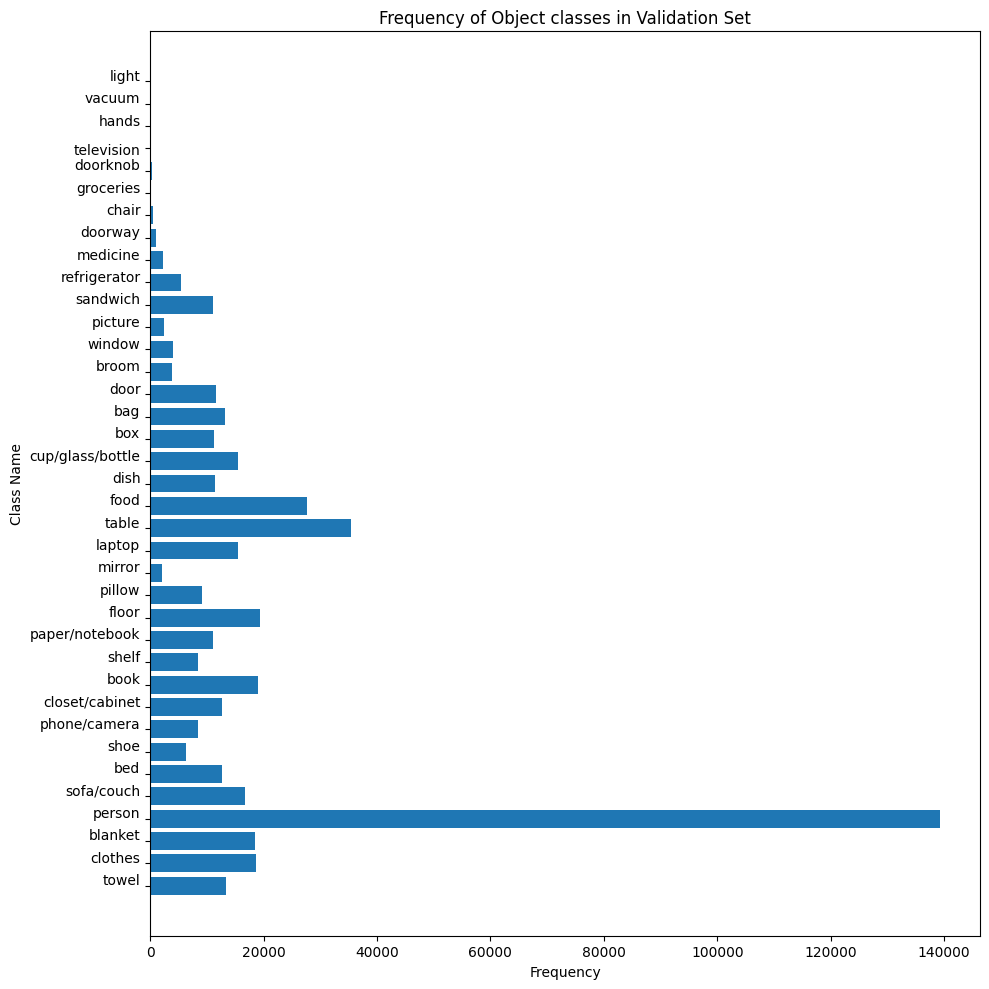

In [29]:
# analyse the bbox_labels from val.json, and then use classes.txt to get the class names

# refer to sample_question.json file to understand the structure of a question
obj_counts = {}
for i in range(len(val_data)):
    entry = val_data[i]
    for situation in entry["situations"]:
        val = entry["situations"][situation]
        for obj in val["bbox_labels"]:
            obj_counts[obj] = obj_counts.get(obj, 0) + 1

class_names_map = {}
with open(f"{dataset_root}/classes/object_classes.txt", "r") as f:
    for line in f:
        class_id, class_name = line.split(" ")
        class_names_map[class_id] = class_name

# # get the class names for each bbox_label
# class_name_counts = {}
# for labels in bbox_labels:
#     for label in labels:
#         if label in class_name_counts:
#             class_name_counts[label] += 1
#         else:
#             class_name_counts[label] = 1

# sort the class names by frequency
# obj_counts = {k: v for k, v in sorted(obj_counts, key=lambda item: item[1], reverse=True)}
print(obj_counts)
class_names_counts = {class_names_map[k]: v for k, v in obj_counts.items()}
print(class_names_counts)

# make plot of class name frequencies
plt.figure(figsize=(10, 10))
plt.barh(list(class_names_counts.keys()), list(class_names_counts.values()))
plt.xlabel("Frequency")
plt.ylabel("Class Name")
plt.title("Frequency of Object classes in Validation Set")
plt.tight_layout()
plt.savefig("class_name_frequencies.png")